<a href="https://colab.research.google.com/github/ecccrs/Final-Project/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Erica Chen, Cameron Cloud, Raphaela Sills: Final Project DS 201

A stroke occurs when 

BRAIN STROKE DATASET

link: https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset

The final project will be a group project (up to 5 students) where students will turn in a tutorial that will walk users through the entire data science process: Business Understanding>Data Understanding> Data Preparation>Modeling+Evaluating (EDA+MachineLearningModelTraining)>Deployment.

You will need to create material for a tutorial that includes: Code, Text to explain the steps and the code, and a Video taking users through the entire process. The tutorial should be self-contained (e.g., code can download the data, do all the data preprocessing, perform all the EDA and ML model training and evaluation) a mix of Markdown text and Python or R code. Your code should have a link that allows users to run it in either Kaggle R or Python Kernels or Colab for Python. These files should be self-contained (automatically download the dataset and run all the analysis) so the user should just click and run (for example see this Jupiter notebook). You will host all this material on a GitHub statically hosted Page. You will also create a video taking users through the entire process, which has to be hosted on YouTube (as unlisted)butyouwillhavethelinkonyourGitHubpage.Finally,youwillneedtocreateavideopresentation of the work summarizing it in a professional manner.


This video should not be more than 5mins long, and it should present to decision-makers the importance of the problem you are trying to tackle, the insight you have found from your analysis, and the action that can be taken based on this insight. This video presentation has to be hosted on YouTube (as unlisted)butyouwillhavethelinkonyourGitHubpageaswell.

In [ ]:
#Our Github
!git clone https://github.com/ecccrs/Final-Project
%cd Final-Project

Cloning into 'Final-Project'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 14 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.
/content/Final-Project


In [ ]:
# Python ≥3.5 is required
import sys
import os
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
#Scikit-learn for implemeting LinearRegression from a existing algorithm.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

# Common imports
import numpy as np
import pandas as pd

from IPython.display import clear_output

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')

def computeCost(X, y, theta):
    return 1/(2*y.size)*np.sum(np.square(X.dot(theta)-y))

In [ ]:
# Load data; view first 5 rows
url = 'https://github.com/ecccrs/Final-Project/blob/main/data/brain_stroke.csv?raw=true' # raw version of data
data = pd.read_csv(url)
print(data.head(5))

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1  


**PART I: EDA**

Data Overview

In [ ]:
# Explore features
data.info()

# Describte the data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [ ]:
# See if there are any null values 
data.isnull().sum() #Number of null values = 0

# See if there are any duplicates
data.duplicated().sum() # Number of duplicates = 0

0

In [ ]:
# Create lists (will turn into dataframe)
col_names = list(data.columns)
unique_values = []

# Identify number of unique values per column
unique_values.append(len(data['gender'].unique()))
unique_values.append(len(data['age'].unique())) 
unique_values.append(len(data['hypertension'].unique()))
unique_values.append(len(data['heart_disease'].unique())) 
unique_values.append(len(data['ever_married'].unique())) 
unique_values.append(len(data['work_type'].unique())) 
unique_values.append(len(data['Residence_type'].unique())) 
unique_values.append(len(data['avg_glucose_level'].unique())) 
unique_values.append(len(data['bmi'].unique())) 
unique_values.append(len(data['smoking_status'].unique())) 
unique_values.append(len(data['stroke'].unique())) 

# Create dataframe
col_names_df = pd.DataFrame(col_names, columns = ['column_name']) # list to df
unique_df = pd.DataFrame(unique_values, columns = ['number_of_unique']) # list to df
df = pd.concat([col_names_df, unique_df], axis=1)

print(df)

          column_name  number_of_unique
0              gender                 2
1                 age               104
2        hypertension                 2
3       heart_disease                 2
4        ever_married                 2
5           work_type                 4
6      Residence_type                 2
7   avg_glucose_level              3895
8                 bmi               342
9      smoking_status                 4
10             stroke                 2


Data breakdown

In [ ]:
# Gender breakdown
occur = data.groupby(['gender']).size()
print(occur)

gender
Female    2907
Male      2074
dtype: int64


In [ ]:
# hypertension breakdown (0 = No hypertension)
occur = data.groupby(['hypertension']).size()
print(occur)

hypertension
0    4502
1     479
dtype: int64


In [ ]:
# ever_married breakdown
occur = data.groupby(['ever_married']).size()
print(occur)

ever_married
No     1701
Yes    3280
dtype: int64


In [ ]:
# work_type breakdown
occur = data.groupby(['work_type']).size()
print(occur)

work_type
Govt_job          644
Private          2860
Self-employed     804
children          673
dtype: int64


In [ ]:
# Residence_type breakdown
occur = data.groupby(['Residence_type']).size()
print(occur)

Residence_type
Rural    2449
Urban    2532
dtype: int64


In [ ]:
# smoking_status breakdown
occur = data.groupby(['smoking_status']).size()
print(occur)

smoking_status
Unknown            1500
formerly smoked     867
never smoked       1838
smokes              776
dtype: int64


In [ ]:
# stroke breakdown (0 = No stroke)
occur = data.groupby(['stroke']).size()
print(occur)

stroke
0    4733
1     248
dtype: int64


In [ ]:
# Visualization: age histogram
data['age'].plot.hist(grid=False, bins=20, rwidth=0.9, color ='#607c8e')
plt.title('Age distribution')

Text(0.5, 1.0, 'Age distribution')

**PART II:ML MODEL TRAINING**

In [ ]:
data['gender'] = data['gender'].map({'Female':1,'Male':0})
data['ever_married'] = data['ever_married'].map({'Yes': 1, 'No': 0})
data['work_type'] = data['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job':2, 'children':3})
data['Residence_type'] = data['Residence_type'].map({'Urban': 1, 'Rural':0})
data['smoking_status'] = data['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})

In [ ]:
X=data.drop(['stroke'],axis=1)
y=data.stroke.values

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

[[1417    0]
 [  78    0]] 
 Accuracy =  0.9478260869565217
train_score =  0.9512335054503729 
 Test_score =  0.9478260869565217


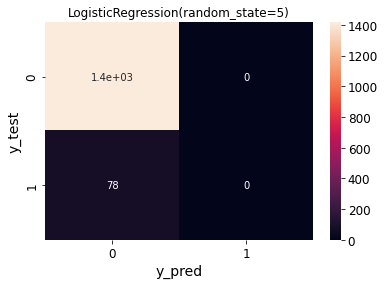

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

log_reg=LogisticRegression(random_state=5)
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
y_pred=log_reg.predict(X_test)
print(confusion_matrix(y_test,y_pred),"\n","Accuracy = ",metrics.accuracy_score(y_test,y_pred))
print('train_score = ',log_reg.score(X_train, y_train),'\n','Test_score = ',log_reg.score(X_test,y_test))
Log_pred=[log_reg]
for i in Log_pred:
    y_pred=i.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
    plt.xlabel('y_pred')
    plt.ylabel('y_test')
    plt.title(i)

In [ ]:
y=data.stroke.values
x_data=data.drop(["stroke","gender",'ever_married','work_type','Residence_type','smoking_status','heart_disease','hypertension','age'], axis=1)
x=(x_data-np.min(x_data)/np.max(x_data)-np.min(x_data)).values
X_new = np.linspace(0, 3, 10).reshape(-1, 1)
x_data

,avg_glucose_level,bmi
0,228.69,36.6
1,105.92,32.5
2,171.23,34.4
3,174.12,24.0
4,186.21,29.0
...,...,...
4976,70.15,29.8
4977,191.15,31.1
4978,95.02,31.8
4979,83.94,30.0


In [ ]:
X = data.drop(["stroke","gender",'ever_married','work_type','Residence_type','smoking_status','heart_disease','hypertension','age'], axis=1)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=10000000000, random_state=42)

In [ ]:
#trash below

In [ ]:
y_pred_prob = model_1.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()
predictions_1 = model_1.predict(X_test)
cm = confusion_matrix(y_test, predictions_1, labels = model_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_1.classes_)
disp.plot()

AttributeError: ignored